# Stage Analysis

In this notebook I analyze the time the program takes for each stage of the algorithm.
Here you will find the 3 versions:

1. Sequential
2. Parallel THR (Native C++ Threads)
3. Parallel FF (using Fast Flow Lib)


In [1]:
from b_tools.preprocess import get_standardized_measures

### Sequential (SEQ)

In [4]:
# Choose the file
DATASET=50

In [5]:
seq = get_standardized_measures(f"results/sequential_{DATASET}.csv")

In [6]:
seq.describe()

,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
count,5.000000e+00,5.000000e+00,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,3.149692e+07,1.025086e+09,166680.000000,4.453674e+09,1.449200e+10,5.023430e+07,2.005266e+10
std,3.602639e+05,3.280735e+05,5804.781477,3.072299e+06,2.239234e+08,1.884608e+07,2.203087e+08
min,3.112081e+07,1.024830e+09,160180.000000,4.449294e+09,1.409784e+10,1.663296e+07,1.966970e+10
25%,3.125003e+07,1.024832e+09,161422.000000,4.451619e+09,1.454947e+10,5.638078e+07,2.008313e+10
50%,3.135374e+07,1.024879e+09,168566.000000,4.455380e+09,1.455481e+10,5.862962e+07,2.011436e+10
75%,3.184320e+07,1.025410e+09,169106.000000,4.455677e+09,1.461404e+10,5.882722e+07,2.018271e+10
max,3.191684e+07,1.025477e+09,174126.000000,4.456400e+09,1.464386e+10,6.070089e+07,2.021341e+10


In [7]:
seq_stages = list(seq.columns)
seq_stages.remove('TOTAL')
seq_means = [seq[stage].mean() for stage in seq_stages]

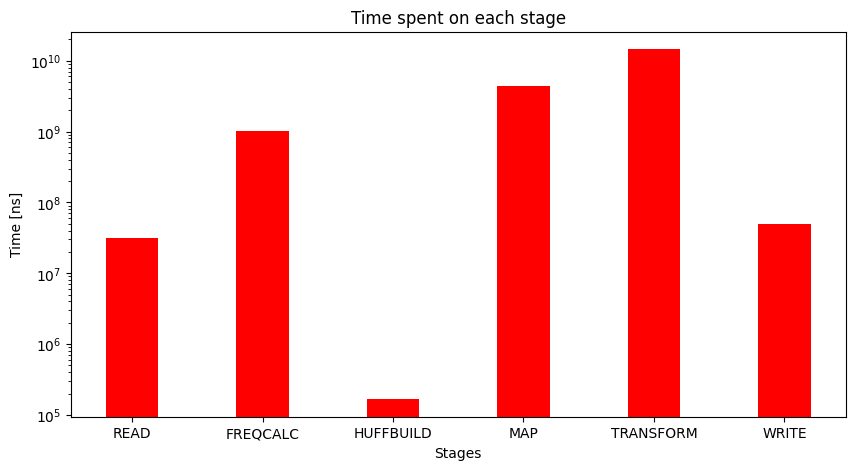

In [8]:
import matplotlib.pyplot as plt 
 
fig = plt.figure(figsize = (10, 5))
plt.bar(seq_stages, seq_means, color='red', width=0.4)
 
plt.xlabel("Stages")
plt.ylabel("Time [ns]")
plt.yscale('log')
plt.title("Time spent on each stage")
plt.show()

## Parallel (THR)

In [9]:
thr = get_standardized_measures(f'results/thr_{DATASET}.csv', excluded_columns=['P_DEGREE'])

In [10]:
def plot_for_p(p_degree, data):
    thr_data = data[data['P_DEGREE'] == p_degree]
    thr_stages = list(thr_data.columns)
    thr_stages.remove('TOTAL')
    thr_stages.remove('P_DEGREE')
    thr_means = [thr_data[stage].mean() for stage in thr_stages]
    fig = plt.figure(figsize = (10, 5))
    plt.bar(thr_stages, thr_means, color='blue', width=0.4)
    plt.xlabel("Stages")
    plt.ylabel("Time [ns]")
    plt.yscale('log')
    plt.title("Time spent on each stage")
    plt.show()

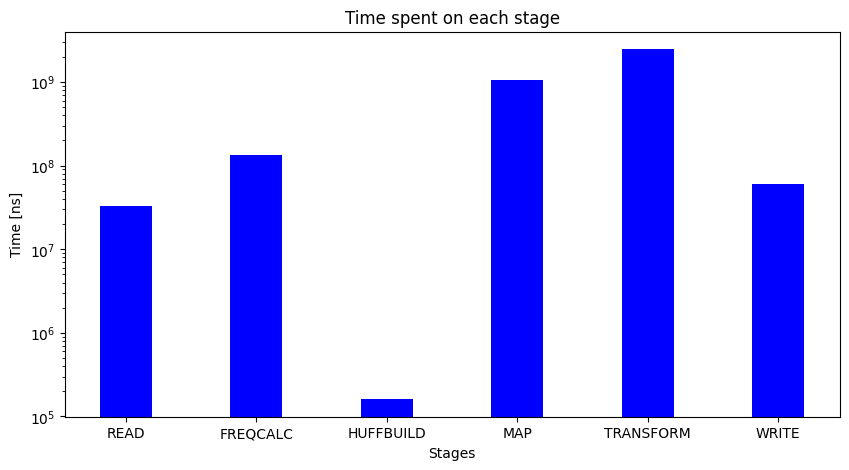

In [11]:
plot_for_p(6, thr)

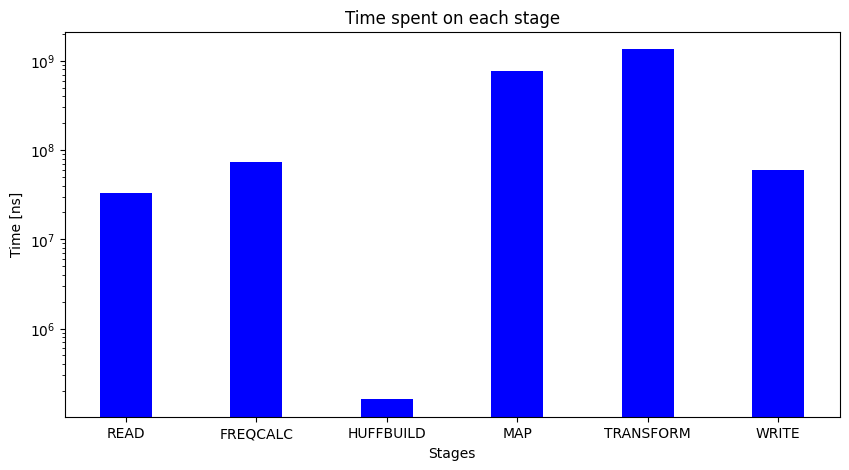

In [12]:
plot_for_p(11, thr)

In [13]:
thr[thr['TOTAL'] == thr['TOTAL'].max()]

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
2,1,32310648,803158411,157526,4765851633,14481733604,64450066,20147661888
